In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from glob import glob
import numpy as np

In [ ]:
example_data = pd.read_csv('ssrt_metrics/standard.csv', index_col=0)
example_data.columns = example_data.columns.str.replace('SSRT_', '')
melt_df = pd.melt(example_data, id_vars=['SSD'], value_vars=['SSRT','w_guesses','w_graded'], var_name = 'assumed_go_dist', value_name='SSRT')

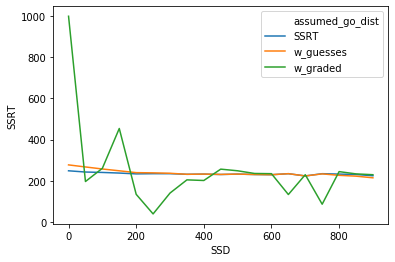

In [3]:
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed_go_dist', data=melt_df)

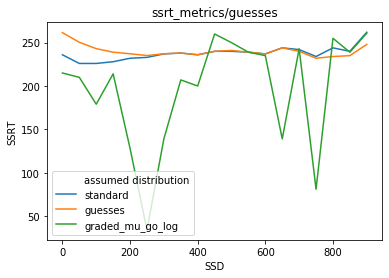

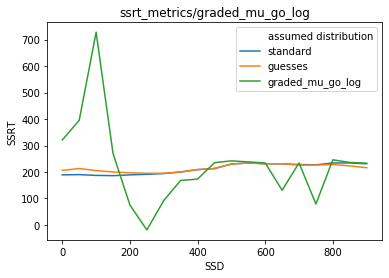

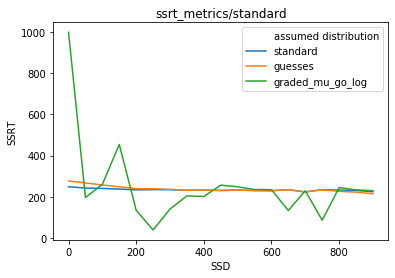

In [4]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    title = file.split('indiv_')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard','guesses','graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    
    _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', data=melt_df)
    
    plt.title(title)
    plt.show()
    plt.close()
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

In [29]:
full_metric_df

,standard,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,guesses,graded_mu_go_log,underlying distribution
0,236.0,0.0,0.275128,2535.0,387.446868,229.499031,1,0.000008,NaN,NaN,0.0,261.563306,215.0,guesses
1,226.0,50.0,0.382488,2535.0,387.446868,241.438538,1,0.000008,NaN,NaN,50.0,250.387809,210.0,guesses
2,226.0,100.0,0.499760,2535.0,387.446868,254.315514,1,0.000008,NaN,NaN,100.0,243.074639,179.0,guesses
3,228.0,150.0,0.602568,2535.0,387.446868,268.018696,1,0.000008,NaN,NaN,150.0,239.000000,214.0,guesses
4,232.0,200.0,0.686768,2535.0,387.446868,280.744136,1,0.000008,NaN,NaN,200.0,237.188969,128.0,guesses
5,233.0,250.0,0.750752,2535.0,387.446868,293.482411,1,0.000008,NaN,NaN,250.0,235.120336,34.0,guesses
6,237.0,300.0,0.803896,2535.0,387.446868,304.712938,1,0.000008,NaN,NaN,300.0,237.204245,139.0,guesses
7,238.0,350.0,0.844600,2535.0,387.446868,315.037408,1,0.000008,NaN,NaN,350.0,238.000000,207.0,guesses
8,236.0,400.0,0.875392,2535.0,387.446868,324.749483,1,0.000008,NaN,NaN,400.0,236.000000,200.0,guesses
9,240.0,450.0,0.902616,2535.0,387.446868,333.428023,1,0.000008,NaN,NaN,450.0,240.000000,260.0,guesses


# organize ssrt metric data

In [23]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    title = file.split('/')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard', 'guesses', 'graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

# SSRT by SSD

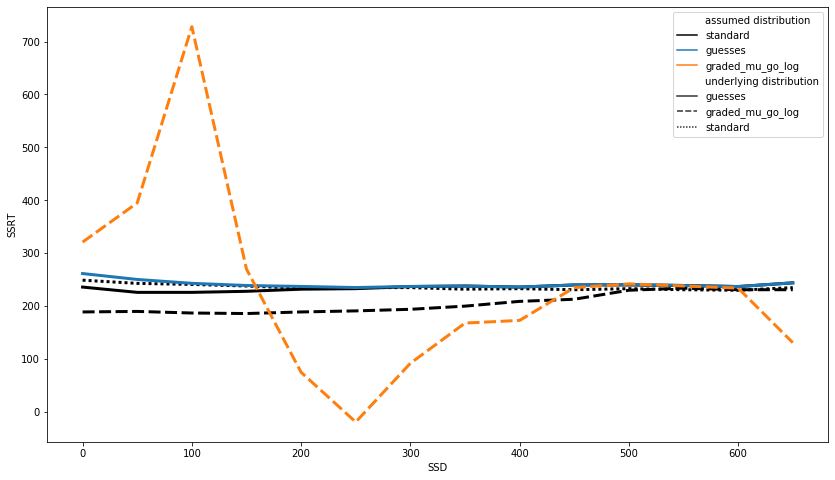

In [24]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
keep_idx = ((full_melt['assumed distribution'] == 'standard') | (full_melt['assumed distribution'] == full_melt['underlying distribution'])) & (full_melt['SSD'] <= 650)
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', style='underlying distribution', data=full_melt[keep_idx], palette=['k', '#1f77b4', '#ff7f0e'], linewidth=3)
plt.savefig('figures/SSRT_by_SSD_supplement.pdf')

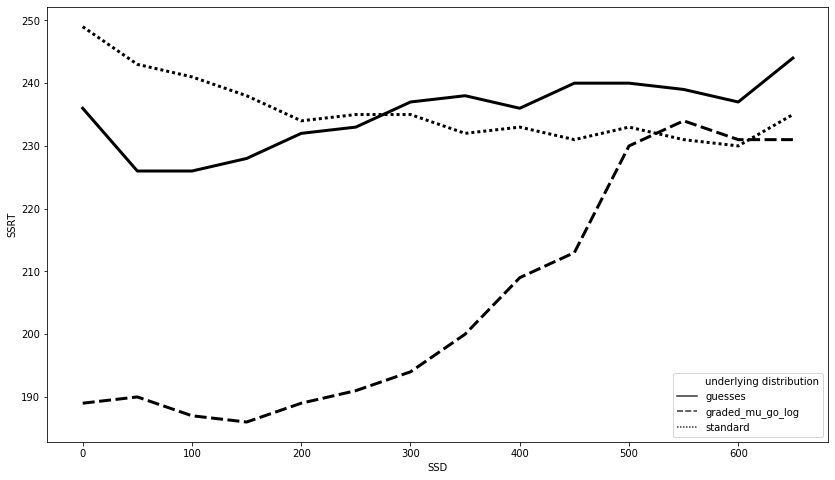

In [25]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='SSRT', color='k', style='underlying distribution', data=full_melt[(full_melt['assumed distribution'] == 'standard') & (full_melt['SSD'] <= 650)], linewidth=3)
plt.savefig('figures/SSRT_by_SSD.pdf')

# Inhibition Function

In [26]:
abcd_inhib_func = pd.read_csv('abcd_data/abcd_inhib_func.csv')

In [27]:
inhib_func_df = pd.concat([full_metric_df[['SSD', 'p_respond', 'underlying distribution']], abcd_inhib_func], 0)

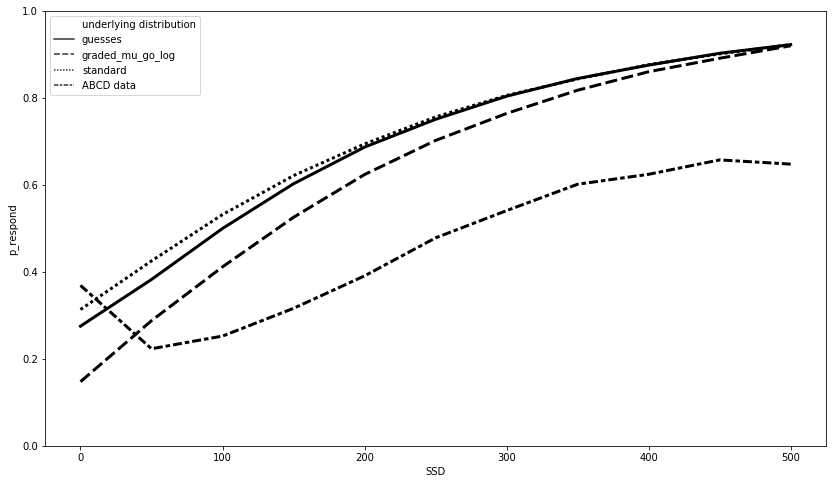

In [28]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='p_respond', color='k', style='underlying distribution', data=inhib_func_df.query('SSD <= 500'), linewidth=3)
plt.ylim([0,1])
plt.savefig('figures/inhibition_function.pdf')

# Individual Differences

In [30]:
ABCD_SSD_dists = pd.read_csv('abcd_data/SSD_dist_by_subj.csv')
ABCD_SSD_dists

,NARGUID,SSDDur,proportion
0,003RTV85,300.0,0.250000
1,003RTV85,250.0,0.183333
2,003RTV85,400.0,0.183333
3,003RTV85,350.0,0.166667
4,003RTV85,450.0,0.100000
...,...,...,...
64043,xxmy9wd8,100.0,0.183333
64044,xxmy9wd8,150.0,0.133333
64045,xxmy9wd8,200.0,0.116667
64046,xxmy9wd8,250.0,0.100000


In [34]:
indiv_SSRTs = pd.DataFrame()
for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    data =  pd.read_csv(file, index_col=0)
    
#     if 'graded' in file:
#         data.loc[data.SSD==0, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']] = data.loc[data.SSD==50.0, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values
#     else:
#         data.loc[data.SSD==0, 'SSRT_w_graded'] = data.loc[data.SSD==50.0, 'SSRT_w_graded'].values
    
    gen_str = file.split('/')[-1].replace('.csv', '')
    indiv_ssrt_df = pd.DataFrame(np.nan, index=ABCD_SSD_dists.NARGUID.unique(), columns=['vanilla', 'w_guesses', 'w_graded'])
    for sub in ABCD_SSD_dists.NARGUID.unique():
        curr_sub = ABCD_SSD_dists.query("NARGUID=='%s'" % sub)
        indiv_ssrt_df.loc[sub, :] = [0, 0, 0]
        for SSD in curr_sub.SSDDur:
            ssd_SSRTs = data.loc[data.SSD==SSD, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values[0]
            weight = curr_sub.loc[curr_sub.SSDDur==SSD, 'proportion'].values
            indiv_ssrt_df.loc[sub, :] +=  ssd_SSRTs * weight
    indiv_SSRTs = pd.concat([indiv_SSRTs, indiv_ssrt_df.add_prefix('gen-%s_SSRT-' % gen_str)], 1)

In [35]:
indiv_SSRTs

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
003RTV85,235.633333,237.390279,158.166667,198.400000,200.930405,134.200000,234.016667,236.645048,169.000000
00CY2MDM,229.266667,249.049649,199.566667,188.283333,206.285312,429.316667,242.866667,263.456839,463.116667
00HEV6HB,233.933333,245.108016,152.983333,190.733333,200.256427,188.816667,239.750000,252.645475,408.166667
00LJVZK2,233.783333,243.695490,191.333333,198.850000,207.793708,273.716667,237.966667,248.691774,348.700000
00NPMHND,238.183333,239.049600,211.916667,220.150000,221.069587,211.266667,232.050000,233.124977,215.316667
...,...,...,...,...,...,...,...,...,...
hkfm1ruj,235.550000,239.413352,194.466667,203.700000,207.787314,211.300000,234.333333,238.578042,219.216667
hx1ru4hv,230.250000,243.233135,166.216667,188.583333,201.871971,280.266667,239.266667,253.082522,335.466667
jf8w3pw6,229.650000,241.297205,167.216667,188.750000,201.634398,309.666667,238.366667,250.540447,271.250000
x8k59,230.866667,239.807456,151.650000,189.966667,200.324467,237.116667,237.083333,246.711968,222.350000


In [ ]:
indiv_SSRTs.to_csv('outputs/ABCD_weighted_SSRTs.csv')
indiv_SSRTs

In [ ]:
indiv_SSRTs.corr().to_csv('outputs/ABCD_weighted_SSRTs_corr.csv')
indiv_SSRTs.corr()

In [36]:
indiv_SSRTs.corr(method='spearman').to_csv('outputs/ABCD_weighted_SSRTs_rank-corr.csv')
indiv_SSRTs.corr(method='spearman')

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
gen-guesses_SSRT-vanilla,1.000000,-0.590848,0.129090,0.967491,0.201485,-0.623997,-0.905245,-0.909484,-0.589124
gen-guesses_SSRT-w_guesses,-0.590848,1.000000,0.587700,-0.563616,0.545165,0.946691,0.749012,0.756118,0.964578
gen-guesses_SSRT-w_graded,0.129090,0.587700,1.000000,0.141254,0.959101,0.646484,0.032465,0.042671,0.631322
gen-graded_mu_go_log_SSRT-vanilla,0.967491,-0.563616,0.141254,1.000000,0.242857,-0.576178,-0.911058,-0.910700,-0.567167
gen-graded_mu_go_log_SSRT-w_guesses,0.201485,0.545165,0.959101,0.242857,1.000000,0.583899,-0.049304,-0.034903,0.557232
gen-graded_mu_go_log_SSRT-w_graded,-0.623997,0.946691,0.646484,-0.576178,0.583899,1.000000,0.703239,0.713489,0.955778
gen-standard_SSRT-vanilla,-0.905245,0.749012,0.032465,-0.911058,-0.049304,0.703239,1.000000,0.998796,0.729949
gen-standard_SSRT-w_guesses,-0.909484,0.756118,0.042671,-0.910700,-0.034903,0.713489,0.998796,1.000000,0.738689
gen-standard_SSRT-w_graded,-0.589124,0.964578,0.631322,-0.567167,0.557232,0.955778,0.729949,0.738689,1.000000


In [38]:
indiv_SSRTs.filter(regex='SSRT-vanilla').corr(method='spearman')

,gen-guesses_SSRT-vanilla,gen-graded_mu_go_log_SSRT-vanilla,gen-standard_SSRT-vanilla
gen-guesses_SSRT-vanilla,1.000000,0.967491,-0.905245
gen-graded_mu_go_log_SSRT-vanilla,0.967491,1.000000,-0.911058
gen-standard_SSRT-vanilla,-0.905245,-0.911058,1.000000
